# __Title :  Analyzing Weather Data from OpenWeatherMap API__

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium

### __Task 1:  Register and obtain API key from OpenWeatherMap.__

In [3]:
# Step 1: Register and obtain API key from OpenWeatherMap
api_key = "b5d5f6e620edb08c92302ba730963c53"

### __Task 2:  Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location.__


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/forecast"
city_name = "Nashik"
params = {
 "q": city_name,
 "appid": api_key,
 "units": "metric"
}
response = requests.get(base_url, params=params)
data = response.json()

# Check if the response is successful
if response.status_code == 200:
    # Print some relevant information
    print(f"Weather forecast for {city_name}:")
    for forecast in data['list']:
        dt = forecast['dt_txt']
        temp = forecast['main']['temp']
        description = forecast['weather'][0]['description']
        print(f"Date & Time: {dt}, Temp: {temp}°C, Weather: {description}")
else:
    print(f"Error: {data['message']}")

Weather forecast for Nashik:
Date & Time: 2024-10-08 06:00:00, Temp: 28.88°C, Weather: clear sky
Date & Time: 2024-10-08 09:00:00, Temp: 29.49°C, Weather: clear sky
Date & Time: 2024-10-08 12:00:00, Temp: 28.74°C, Weather: few clouds
Date & Time: 2024-10-08 15:00:00, Temp: 25.86°C, Weather: overcast clouds
Date & Time: 2024-10-08 18:00:00, Temp: 25.3°C, Weather: overcast clouds
Date & Time: 2024-10-08 21:00:00, Temp: 23.86°C, Weather: overcast clouds
Date & Time: 2024-10-09 00:00:00, Temp: 23.03°C, Weather: overcast clouds
Date & Time: 2024-10-09 03:00:00, Temp: 25.54°C, Weather: overcast clouds
Date & Time: 2024-10-09 06:00:00, Temp: 28.49°C, Weather: light rain
Date & Time: 2024-10-09 09:00:00, Temp: 29.19°C, Weather: light rain
Date & Time: 2024-10-09 12:00:00, Temp: 24.99°C, Weather: light rain
Date & Time: 2024-10-09 15:00:00, Temp: 23.7°C, Weather: light rain
Date & Time: 2024-10-09 18:00:00, Temp: 23.94°C, Weather: overcast clouds
Date & Time: 2024-10-09 21:00:00, Temp: 23.85°C,

### __Task 3: Extract relevant weather attributes such as temperature, humidity, wind speed, and precipitation from the API response.__

In [5]:
# Extract relevant weather attributes and timestamps
weather_data = data["list"]
timestamps = [entry["dt"] for entry in weather_data]
temperatures = [entry["main"]["temp"] for entry in weather_data]
humidity = [entry["main"]["humidity"] for entry in weather_data]
wind_speed = [entry["wind"]["speed"] for entry in weather_data]
weather_description = [item['weather'][0]['description'] for item in weather_data]

### __Task 4: Clean and preprocess the retrieved data, handling missing values or inconsistent formats.__


In [6]:
# Convert timestamps to pandas datetime objects
datetime_objects = [pd.to_datetime(timestamp, unit="s") for timestamp in timestamps]

In [7]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({
 'Timestamp': timestamps,
 "Datetime": datetime_objects,
 'Temperature': temperatures,
 'humidity': humidity,
 'wind_speed': wind_speed,
 'weather_description': weather_description,
})

In [8]:
# Convert the "Datetime" column to a DatetimeIndex
weather_df.set_index("Datetime", inplace=True)


In [9]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({
 'Timestamp': timestamps,
 "Datetime": datetime_objects,
 'Temperature': temperatures,
 'humidity': humidity,
 'wind_speed': wind_speed,
 'weather_description': weather_description,
})

In [10]:
# Convert the "Datetime" column to a DatetimeIndex
weather_df.set_index("Datetime", inplace=True)


In [36]:
weather_df

,Timestamp,Temperature,humidity,wind_speed,weather_description
Datetime,,,,,
2024-09-25 12:00:00,1727265600,17.11,73,4.66,overcast clouds
2024-09-25 15:00:00,1727276400,18.77,67,4.69,overcast clouds
2024-09-25 18:00:00,1727287200,20.53,62,5.13,overcast clouds
2024-09-25 21:00:00,1727298000,19.73,71,5.35,light rain
2024-09-26 00:00:00,1727308800,19.17,78,5.54,light rain
2024-09-26 03:00:00,1727319600,19.36,80,5.54,overcast clouds
2024-09-26 06:00:00,1727330400,19.70,83,5.14,light rain
2024-09-26 09:00:00,1727341200,20.01,85,4.54,overcast clouds
2024-09-26 12:00:00,1727352000,20.46,85,5.04,overcast clouds


### __Task 5: Perform data modeling to analyze weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.__

In [11]:

# Calculate total precipitation (rain + snow) for each entry
precipitation = []
for entry in weather_data:
 rain = entry.get("rain", {}).get("3h", 0)
 snow = entry.get("snow", {}).get("3h", 0)
 total_precipitation = rain + snow
 precipitation.append(total_precipitation)


In [38]:
precipitation

[0,
 0,
 0,
 0.12,
 0.13,
 0,
 0.12,
 0,
 0,
 0.17,
 0.38,
 0.97,
 0.19,
 0.16,
 0.42,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.15,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [12]:
# Step 5: Perform data modeling
avg_temp = sum(temperatures) / len(temperatures)
avg_temp


25.01799999999999

In [13]:
max_temp = max(temperatures)
max_temp


30.42

In [14]:
min_temp = min(temperatures)
min_temp

21.38

### __Task 6: Visualize the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.__

In [15]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()


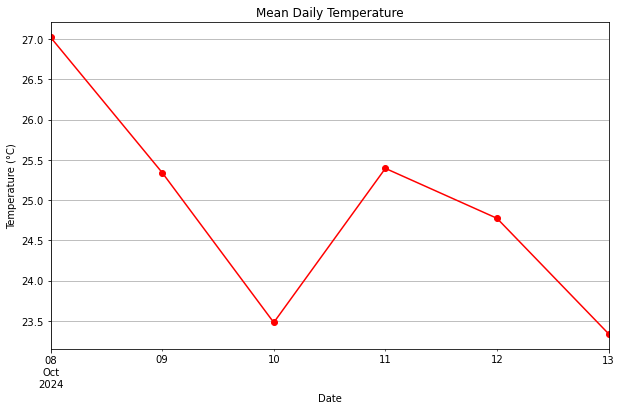

In [16]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


### __Task 7: Apply data aggregation techniques to summarize weather statistics by specific time periods (e.g., daily, monthly, seasonal).__

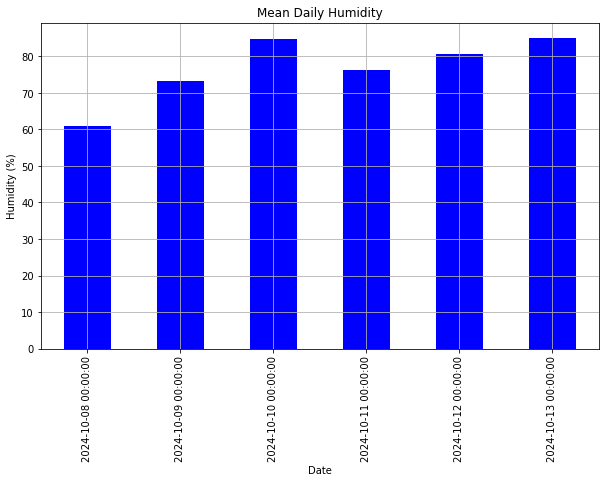

In [17]:

# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()


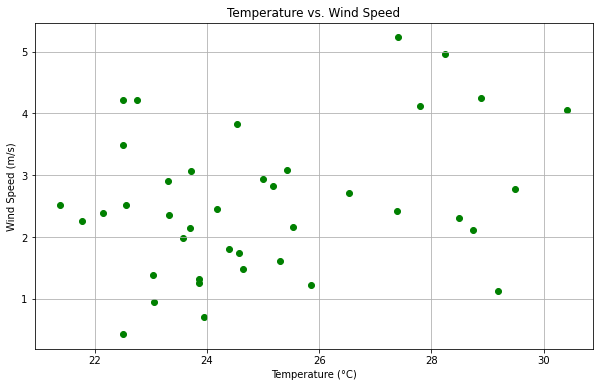

In [18]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()


### __Task 8: Incorporate geographical information, if available, to create maps or geospatial visualizations representing weather patterns across different locations.__

In [35]:
# Assuming weather_data is a list of weather data entries
# Accessing the attributes of the first entry
import pandas as pd
# Specify the locations for which you want to retrieve weather data
locations = ['Pune', 'Mumbai', 'Nashik']
# Create an empty DataFrame to store weather data
weather_df = pd.DataFrame()
# Retrieve weather data for each location
for location in locations:
    # Construct the API URL
    api_url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}&units=metric'
    
    # Make the API request
    response = requests.get(api_url)
    data = response.json()
    
    # Check if the request was successful
    if response.status_code == 200:
        # Extract relevant weather attributes
        temperature = data['main']['temp']
        humidity = data['main']['humidity']
        wind_speed = data['wind']['speed']
        
        # Check if 'coord' key is present before accessing it
        latitude = data.get('coord', {}).get('lat', None)
        longitude = data.get('coord', {}).get('lon', None)
        
        # Create a DataFrame for the current location's weather data
        location_df = pd.DataFrame({
            'Location': [location],
            'Temperature': [temperature],
            'Humidity': [humidity],
            'Wind Speed': [wind_speed],
            'Latitude': [latitude],
            'Longitude': [longitude]
        })
        
        # Append the current location's weather data to the main DataFrame
        weather_df = weather_df.append(location_df, ignore_index=True)
    else:
        print(f"Error retrieving data for {location}: {data['message']}")

# Display the final DataFrame
print(weather_df)

C:\Users\Student\AppData\Local\Temp\ipykernel_13844\2321873009.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append(location_df, ignore_index=True)


  Location  Temperature  Humidity  Wind Speed  Latitude  Longitude
0     Pune        31.99        54        3.61   18.5196    73.8553
1   Mumbai        32.99        55        3.09   19.0144    72.8479
2   Nashik        28.88        56        4.25   19.9833    73.8000


In [37]:
weather_map

In [38]:
# Step 8: Incorporate geographical information
# (Geospatial visualization requires additional libraries like Folium)
# Extract latitude and longitude from the current weather data
latitude = data.get("coord", {}).get("lat", 0)
longitude = data.get("coord", {}).get("lon", 0)
# Create a Folium map centered around the city
weather_map = folium.Map(location=[latitude, longitude], zoom_start=10)
# Add markers for each location in the DataFrame
for index, row in weather_df.iterrows():
 location_name = row['Location']
 latitude = row['Latitude']
 longitude = row['Longitude']
 # Create a marker and add it to the map
 folium.Marker([latitude, longitude], popup=location_name).add_to(weather_map)


In [36]:
# Add a marker for the city's location
folium.Marker([latitude, longitude], popup=city_name).add_to(weather_map)
# Display the map
weather_map.save("weather_map.html")

### __Task 9: Explore and visualize relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps__

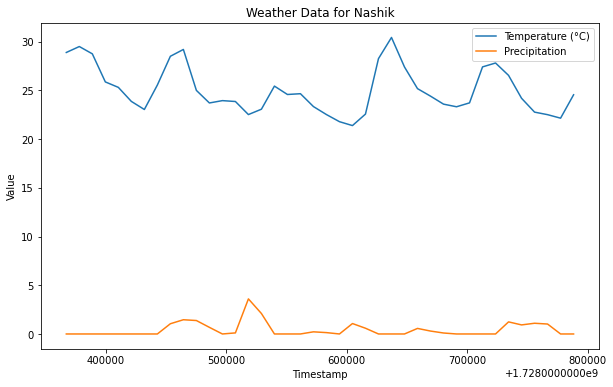

In [21]:
# Step 6: Visualize the weather data
plt.figure(figsize=(10, 6))
plt.plot(timestamps, temperatures, label="Temperature (°C)")
plt.plot(timestamps, precipitation, label="Precipitation")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Weather Data for {}".format(city_name))
plt.legend()
plt.show()


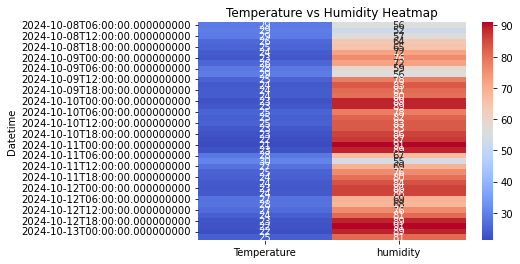

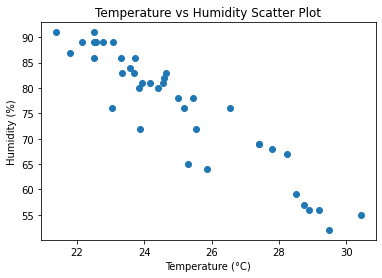

In [22]:
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()
# Create a scatter plot to visualize the relationship between temperature and humid
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()